# Лабораторная работа №1

#### 0. Подключение модулей:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import discriminant_analysis
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix

#### 0.1. Описать задачу словами

Этот набор данных содержит около 10 лет ежедневных наблюдений за погодой из разных мест по всей Австралии.
RainTomorrow - целевая переменная для прогнозирования.
Нужно предсказать, будет ли дождь завтра или нет (бинарная классификация).

#### 1. Прочитать данные

In [3]:
data = pd.read_csv('weatherAUS.csv', sep = ',', engine = 'python') # чтение csv файла

In [3]:
type(data) # формат переменной data

pandas.core.frame.DataFrame

In [4]:
data # выведем наш набор данных

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [5]:
data.columns # все признаки нашего датасета

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
data.shape # размерность

(142193, 24)

In [7]:
data.head() # посмотрим первые пять наблюдений

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [8]:
data.tail() # посмотрим последние пять наблюдений

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


Признаки наблюдений:
* `Date` - Дата наблюдения
* `Location` - Название места расположения метеостанции
* `MinTemp` - Минимальная температура в градусах Цельсия
* `MaxTemp` - Максимальная температура в градусах Цельсия
* `Rainfall` - Количество осадков, зафиксированных за сутки в мм
* `Evaporation` - Так называемое "пан-испарение"(мм) за 24 часа в 9 утра
* `Sunshine` - Количество солнечных часов в течение дня
* `WindGustDir` - Направление самого сильного порыва ветра в течение 24 часов до полуночи
* `WindGustSpeed` - Скорость (км/ч) самого сильного порыва ветра за 24 часа до полуночи
* `WindDir9am` - Направление ветра в 9 утра
* `WindDir3pm` - Направление ветра в 3 часа дня
* `WindSpeed9am` - Средняя скорость (в течение 10 минут) ветра (км/ч) в 9 утра
* `WindSpeed3pm` - Средняя скорость (в течение 10 минут) ветра (км/ч) в 3 часа дня
* `Humidity9am` - Влажность воздуха (в процентах) в 9 утра
* `Humidity3pm` - Влажность (в процентах) в 3 часа дня
* `Pressure9am` - Среднее значение атмосферного давления (гПа) над уровнем моря в 9 утра
* `Pressure3pm` - Среднее значение атмосферного давления (гПа) над уровнем моря в 3 часа дня
* `Cloud9am` - Часть неба, скрытая облаками, в 9 утра. Этот показатель измеряется в октантах. Данный признак означает, сколько октантов (небо разделяется на 8 частей) неба скрыто облаками. Показатель 0 указывает на полностью чистое небо, в то время как показатель 8 указывает на то, что оно полностью затянуто облаками.
* `Cloud3pm` - Часть неба, скрытая облаками (измеряется в октантах), в 3 часа дня
* `Temp9am` - Температура (градусы Цельсия) в 9 утра
* `Temp3pm` - Температура (градусы Цельсия) в 3 часа дня
* `RainToday` - Логическое значение: 1, если Осадки (мм) в течение 24 часов до 9 утра превышают 1 мм, в противном случае 0
* `RISK_MM` - Количество дождя на следующий день в мм. Используется для создания переменной RainTomorrow. Своего рода мера "риска".
* `RainTomorrow` - Целевая переменная. Будет ли завтра дождь?

In [5]:
data.drop(['RISK_MM'], axis=1, inplace=True) # в описании датасета сказано, что данный признак следует удалить. Он служебный

In [10]:
data # проверяем отсутствие признака RISK_MM

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


#### 2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.

In [11]:
data.describe() # смотрим средние значения, разброс, минимумы и максимумы

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


По данным характеристикам можно понять некоторые особенности нашего набора данных. Например, сравнивая среднее значение и медиану, можем понять, какие значения преобладают в выборке. Если среднее значение больше, чем медиана, значит данный признак принимает чаще меньшие значения, чем бОльшие.

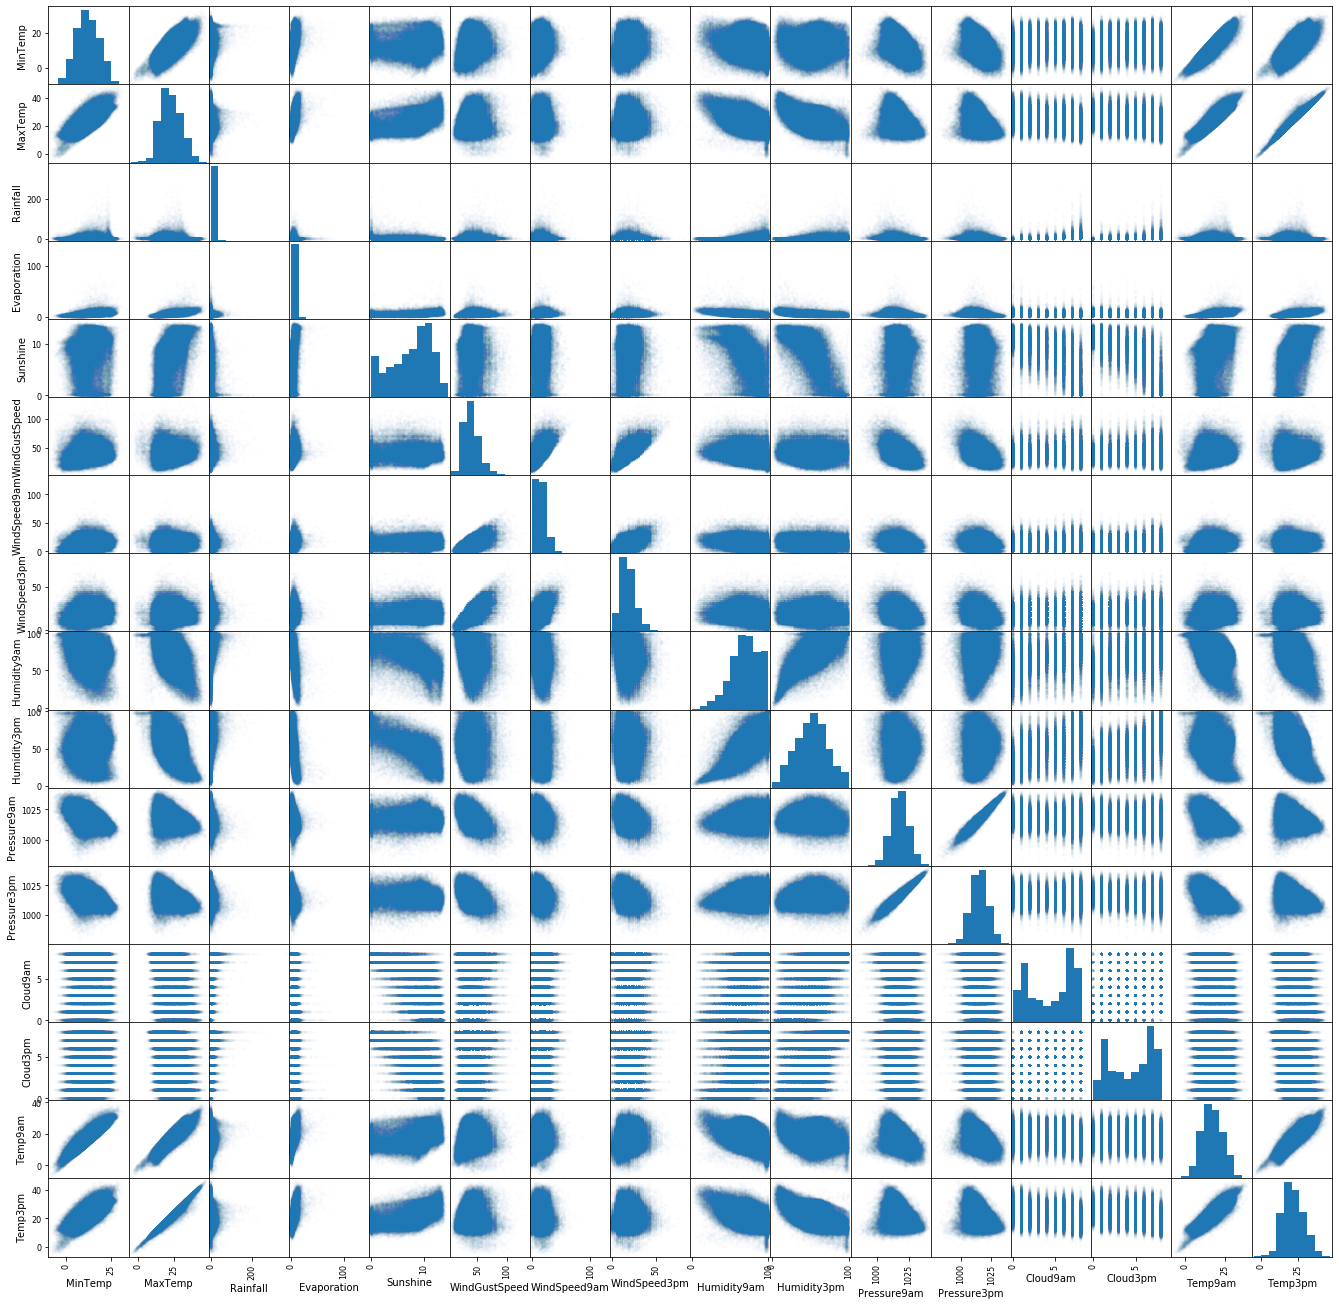

In [12]:
# проверим взаимосвязь между переменными
scatter_matrix(data, alpha = .01, figsize = (23, 23))
pass

In [13]:
data.corr() # посмотрим матрицу корреляции

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989


Видим, что некоторые признаки имеют линейную зависимость (что вполне логично). Например, температура в 3 часа дня/9 утра и минимальная/максимальная температура. Некоторые признаки не имеют вообще никакой зависимости. Например, зависимость температуры и влажности. Рассмотрим график зависимости количества солнечных часов в течение дня и облачности. Должны получить обратную зависимость: чем больше солнечных часов, тем менее облачно должно быть.

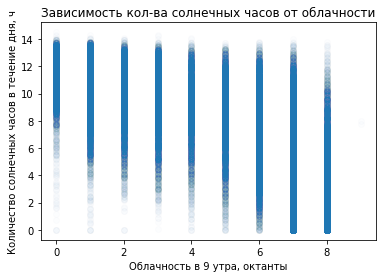

In [14]:
# посмотрим зависимость кол-ва солнечных часов от облачности
plt.plot(data['Cloud9am'], data['Sunshine'], 'o', alpha = 0.01)
plt.xlabel('Облачность в 9 утра, октанты')
plt.ylabel('Количество солнечных часов в течение дня, ч')
plt.title('Зависимость кол-ва солнечных часов от облачности')
pass

В принципе из графика мы видим, что при ясном небе (0 октантов) чаще бывает длинный солнечный день. И наоборот, при сильной облачности наш световой день очень короткий.

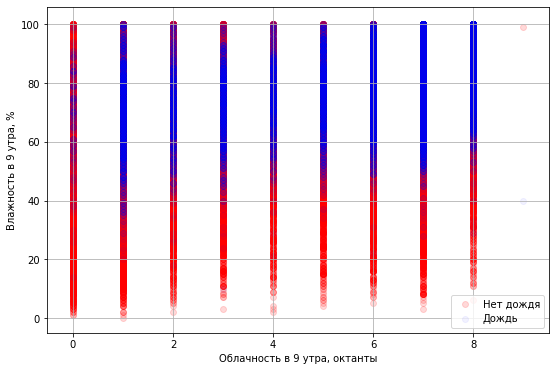

In [15]:
# зависимость наличия дождя от влажности и облачности
plt.figure(figsize = (9, 6))

plt.scatter(data[data['RainToday'] == 'No']['Cloud9am'],
            data[data['RainToday'] == 'No']['Humidity9am'],
            alpha = 0.15,
            label = 'Нет дождя',
            color = 'r')

plt.scatter(data[data['RainToday'] == 'Yes']['Cloud9am'],
            data[data['RainToday'] == 'Yes']['Humidity9am'],
            alpha = 0.05,
            label = 'Дождь',
            color = 'b')

plt.xlabel('Облачность в 9 утра, октанты')
plt.ylabel('Влажность в 9 утра, %')
plt.legend()
plt.grid()

Интерпретация графика: при влажности больше 50% и облачности от 1 октанты будет зафиксирован дождь. И совершенно логичная зависимость: дождь не пойдет в ясную погоду.

Введём "новую" фичу - "месяц". Тем самым далее избавимся от категориального признака, заменив его количественным. Категориальный признак "дата" мало применим в обучении модели, т.к. из-за него мы можем получить переобучение нашей модели. Модель должна иметь хорошую обобщающую способность и не зависеть от даты наблюдения. 

In [6]:
data['month'] = pd.DatetimeIndex(data['Date']).month

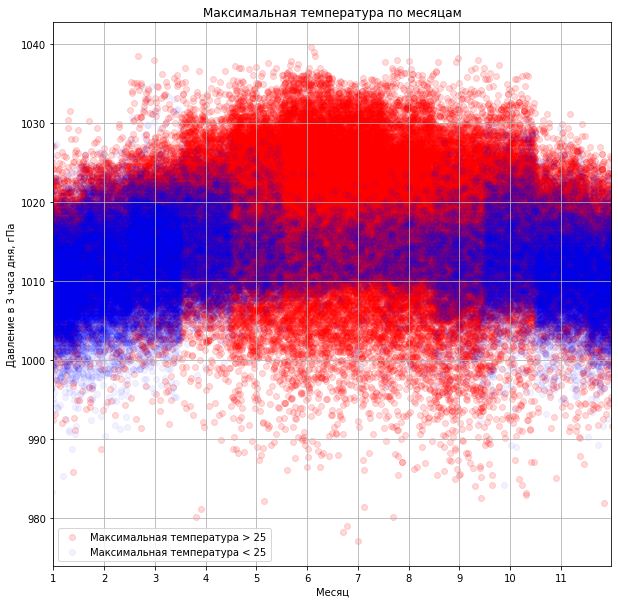

In [17]:
# проанализируем зависимость атмосферного давления и максимальной температуры по месяцам
np.random.seed(0)
education_num_rnd = data['month'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 10))

plt.scatter(education_num_rnd[data['MaxTemp'] < 25],
            data[data['MaxTemp'] < 25]['Pressure3pm'],
            alpha = 0.15,
            label = 'Максимальная температура > 25',
            color = 'r')

plt.scatter(education_num_rnd[data['MaxTemp'] > 25],
            data[data['MaxTemp'] > 25]['Pressure3pm'],
            alpha = 0.05,
            label = 'Максимальная температура < 25',
            color = 'b')

plt.xlabel('Месяц')
plt.xticks(range(12))
plt.xlim(1, 12)
plt.ylabel('Давление в 3 часа дня, гПа')
plt.title('Максимальная температура по месяцам')
plt.legend()
plt.grid()

Из графика зависимости видим, что летом теплее, чем зимой. Летом атмосферное давление изменяется чаще, чем зимой. Зимой оно стабильнее и ниже.

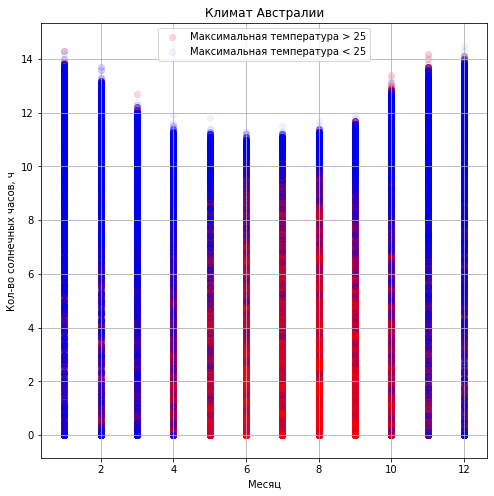

In [18]:
# Посмотрим зависимости температуры и количества солнечных часов по каждому из месяцев
plt.figure(figsize = (8, 8))

plt.scatter(data[data['MaxTemp'] < 25]['month'],
            data[data['MaxTemp'] < 25]['Sunshine'],
            alpha = 0.15,
            label = 'Максимальная температура > 25',
            color = 'r')

plt.scatter(data[data['MaxTemp'] > 25]['month'],
            data[data['MaxTemp'] > 25]['Sunshine'],
            alpha = 0.05,
            label = 'Максимальная температура < 25',
            color = 'b')

plt.xlabel('Месяц')
plt.ylabel('Кол-во солнечных часов, ч')
plt.title('Климат Австралии')
plt.legend()
plt.grid()

Из графика видим, что зимой в Австралии солнечно, но прохладно, а вот летом пасмурно, но тепло. Другими словами, зимой солнечный день дольше (а у нас в верхнем полушарии наоборот).

Посмотрим на категориальные и количественные признаки. Далее будем с ними работать.

In [7]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month']


In [20]:
for c in categorical_columns:
    print(c, data[c].unique())

Date ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Location ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToday ['N

#### 3. Обработать пропущенные значения (или убедиться, что их нет)

In [21]:
# находим медиану по каждому признаку
data.median(axis = 0)

MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
Evaporation         4.8
Sunshine            8.5
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.6
Pressure3pm      1015.2
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            16.7
Temp3pm            21.1
month               6.0
dtype: float64

In [8]:
# заменяем пропущенные значения (nan) на медианы
data = data.fillna(data.median(axis = 0), axis = 0)

In [9]:
data[numerical_columns].count(axis = 0)

MinTemp          142193
MaxTemp          142193
Rainfall         142193
Evaporation      142193
Sunshine         142193
WindGustSpeed    142193
WindSpeed9am     142193
WindSpeed3pm     142193
Humidity9am      142193
Humidity3pm      142193
Pressure9am      142193
Pressure3pm      142193
Cloud9am         142193
Cloud3pm         142193
Temp9am          142193
Temp3pm          142193
month            142193
dtype: int64

In [24]:
data[categorical_columns].count(axis = 0)

Date            142193
Location        142193
WindGustDir     132863
WindDir9am      132180
WindDir3pm      138415
RainToday       140787
RainTomorrow    142193
dtype: int64

In [25]:
data['WindDir9am'].describe()

count     132180
unique        16
top            N
freq       11393
Name: WindDir9am, dtype: object

In [26]:
type(data['WindDir9am'].describe())

pandas.core.series.Series

In [27]:
data['WindDir9am'].describe().top

'N'

In [28]:
data['WindDir3pm'].describe().top

'SE'

In [29]:
data.describe(include = [object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2017-02-27,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


In [10]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [11]:
data.describe(include = [object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,142193,142193,142193,142193,142193
unique,3436,49,16,16,16,2,2
top,2016-05-29,Canberra,W,N,SE,No,No
freq,49,3418,19110,21406,14441,110738,110316


#### 4. Обработать категориальные признаки

Исключим дату:

In [12]:
data.drop(('Date'), axis = 1, inplace = True)

In [13]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['RainToday', 'RainTomorrow'] ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


В бинарном признаке RainToday заменим значения "Yes" и "No" на 1 и 0 соответственно

In [34]:
data['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
data.at[data['RainToday'] == 'No', 'RainToday'] = 0
data.at[data['RainToday'] == 'Yes', 'RainToday'] = 1
data['RainToday'].describe()

count     142193
unique         2
top            0
freq      110738
Name: RainToday, dtype: int64

То же самое действие произведем с целевым признаком RainTomorrow

In [15]:
data.at[data['RainTomorrow'] == 'No', 'RainTomorrow'] = 0
data.at[data['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1
data['RainTomorrow'].describe()

count     142193
unique         2
top            0
freq      110316
Name: RainTomorrow, dtype: int64

In [16]:
nonbinary_columns = nonbinary_columns[1:]
nonbinary_columns

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

К небинарными признакам применим метод векторизации. Признак, принимающий n значений заменим на n признаков, принимающих значения 0 и 1, в зависимости от того, чему равно значение исходного признака.

In [38]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [17]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast',
       'Location_Hobart', 'Location_Katherine', 'Location_Launceston',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF',
       'Location_Penrith', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Richmond', 'Location_Sale',
       'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Ulur

#### 5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)

Алгоритмы машинного обучения будут работать качественнее, если входные данные будут нормализованы. Отмасштабированные данные можно получить, приведя их к нулевому среднему значению с единичным квадратичным отклонением.

In [18]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,month
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,2.326738,5.183213,8.042236,39.920123,13.992489,18.644279,68.858235,51.495742,1017.648460,1015.252481,4.649568,4.702658,16.985681,21.675977,6.402544
std,6.388936,7.109617,8.426426,3.185401,2.769638,13.140632,8.851614,8.721688,18.932512,20.532227,6.746267,6.681810,2.294357,2.118753,6.472206,6.871243,3.426506
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,3.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,6.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,9.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,12.000000


In [19]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [42]:
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,month
count,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05
mean,2.569612e-14,-1.810403e-14,-2.880211e-14,-1.051970e-12,5.161279e-14,1.991174e-15,6.786999e-15,-2.393872e-14,2.093354e-15,-2.782122e-15,1.492662e-11,-8.956525e-12,-2.727375e-15,2.541623e-14,1.631530e-14,-1.015192e-13,-3.532720e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.237717e+00,-3.941895e+00,-2.761239e-01,-1.627177e+00,-2.903714e+00,-2.581316e+00,-1.580784e+00,-2.137692e+00,-3.637036e+00,-2.508045e+00,-5.506521e+00,-5.709902e+00,-2.026523e+00,-2.219540e+00,-3.736853e+00,-3.940477e+00,-1.576692e+00
25%,-7.177353e-01,-7.490368e-01,-2.761239e-01,-3.714486e-01,5.696187e-02,-6.788199e-01,-7.899677e-01,-6.471545e-01,-6.263424e-01,-7.059995e-01,-6.149267e-01,-6.364265e-01,-7.189673e-01,-3.316373e-01,-7.239696e-01,-7.241742e-01,-9.930071e-01
50%,-2.904469e-02,-8.796041e-02,-2.761239e-01,-1.203029e-01,1.652793e-01,-7.002119e-02,-1.121252e-01,4.078577e-02,6.030711e-02,2.455936e-02,-7.183260e-03,-7.854268e-03,1.527365e-01,1.403383e-01,-4.413962e-02,-8.382429e-02,-1.174796e-01
75%,7.222541e-01,6.997051e-01,-2.049193e-01,6.805643e-02,2.374909e-01,4.626777e-01,5.657173e-01,6.140693e-01,7.469566e-01,6.577104e-01,6.153832e-01,6.207179e-01,5.885885e-01,6.123140e-01,6.974931e-01,6.729529e-01,7.580480e-01
max,3.398756e+00,3.498731e+00,4.375203e+01,4.389299e+01,2.331628e+00,7.235564e+00,1.310580e+01,7.837442e+00,1.644883e+00,2.362348e+00,3.461401e+00,3.643851e+00,1.896144e+00,2.028241e+00,3.586771e+00,3.641848e+00,1.633576e+00


In [20]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(142193, 116)


#### 6. Разбить данные на обучающую и тестовую выборки

In [44]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday,RainTomorrow
0,0.190084,-0.045764,-0.204919,-0.120303,0.165279,0.310478,0.678691,0.614069,0.113126,-1.436558,...,0,0,0,0,0,0,1,0,0,0
1,-0.749039,0.263676,-0.276124,-0.120303,0.165279,0.310478,-1.128889,0.384756,-1.312992,-1.290447,...,0,0,0,0,0,0,0,1,0,0
2,0.111824,0.348069,-0.276124,-0.120303,0.165279,0.462678,0.565717,0.843383,-1.629907,-1.046927,...,0,0,0,0,0,0,0,1,0,0
3,-0.467302,0.671574,-0.276124,-0.120303,0.165279,-1.211519,-0.338073,-1.105781,-1.260173,-1.728782,...,0,0,0,0,0,0,0,0,0,0
4,0.831819,1.276389,-0.157450,-0.120303,0.165279,0.082178,-0.789968,0.155442,0.694137,-0.900815,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,-1.359470,-0.200484,-0.276124,-0.120303,0.165279,-0.678820,0.113822,-0.647154,-0.520704,-1.193039,...,0,0,0,0,0,0,0,0,0,0
142189,-1.469034,0.024563,-0.276124,-0.120303,0.165279,-0.678820,-0.112125,-0.876468,-0.943258,-1.339150,...,0,0,0,0,0,0,0,0,0,0
142190,-1.343818,0.291807,-0.276124,-0.120303,0.165279,-1.363718,-0.112125,-1.105781,-0.679162,-1.485262,...,0,0,0,0,0,0,0,0,0,0
142191,-1.062081,0.516854,-0.276124,-0.120303,0.165279,-0.222221,-0.564020,-1.105781,-0.837619,-1.339150,...,0,0,0,0,0,0,1,0,0,0


In [21]:
X = data.drop(('RainTomorrow'), axis = 1) # выбрасываем столбец RainTomorow (это столбец y, верные ответы)
y = data['RainTomorrow']
feature_names = X.columns

In [46]:
type(feature_names)

pandas.core.indexes.base.Index

In [47]:
feature_names

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday'],
      dtype='object', length=115)

In [48]:
print(X.shape)
print(y.shape)
N, d = X.shape

(142193, 115)
(142193,)


In [49]:
type(X)

pandas.core.frame.DataFrame

In [50]:
type(y)

pandas.core.series.Series

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print('Количество обучающих и тестовых данных =  ' + str(N_train) + ' и ' + str(N_test))

Количество обучающих и тестовых данных =  99535 и 42658


#### 7. Запустить классификатор ближайших соседей (попробовать разное их количество)

In [52]:
num_neigh = [5, 10, 20]
y_train_predict = []
y_test_predict = []
for i in range(3):
    knn = KNeighborsClassifier(n_neighbors = num_neigh[i])
    knn.fit(X_train, list(y_train))
    y_train_predict.append(knn.predict(X_train))
    y_test_predict.append(knn.predict(X_test))

#### 8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 

In [53]:
err_train = []
err_test = []
for i in range(3):
    err_train.append(np.mean(y_train != y_train_predict[i]))
    err_test.append(np.mean(y_test  != y_test_predict[i]))
    print('При k = ' + str(num_neigh[i]) + ' ошибка на тренировочном и тестовом наборе = ' \
          + str(err_train[i]) + ' и ' + str(err_test[i]))

При k = 5 ошибка на тренировочном и тестовом наборе = 0.11775757271311599 и 0.16132964508415773
При k = 10 ошибка на тренировочном и тестовом наборе = 0.13718792384588335 и 0.15678184631253222
При k = 20 ошибка на тренировочном и тестовом наборе = 0.14375847691766716 и 0.1547892540672324


In [54]:
# Матрица ошибок для Knn с k = 20
print(confusion_matrix(list(y_test), y_test_predict[2]))

[[31949  1184]
 [ 5419  4106]]


#### 9. Сделать общие выводы

Видим, что с увеличением k ошибка на тестовом наборе уменьшается, а на тренировочном увеличивается. Возможно это связано с тем, что в обучающем наборе данных больше, а значит правильно их классифицировать при такой густоте алгоритму сложнее. На тестовом же это сделать легче.

# Homework 27.11.2020

#### 1. Применить PCA и LDA для сокращения размерности пространства признаков. В каждом случае изобразить точки, сократив размерность пространства до 2.

###### 1.1 PCA

In [29]:
# применяем метод РСА
pca_model_two = PCA(n_components = 2)
X_pca_two = pca_model_two.fit_transform(X)
X_pca_two

array([[ 0.83426125,  1.36216567],
       [ 1.05970019, -0.14747402],
       [ 2.07496505,  0.30662097],
       ...,
       [-0.61883275, -2.22172092],
       [ 0.02708888, -1.65067766],
       [ 0.65738656, -2.40020976]])

In [131]:
print("Главные компоненты (по строкам):")
print(pca_model_two.components_)
print("Дисперсии по главным компонентам:")
print(pca_model_two.explained_variance_)
print("Среднеквадратические отклонения:")
print(np.sqrt(pca_model_two.explained_variance_))

Главные компоненты (по строкам):
[[ 3.22035134e-01  3.97858973e-01 -3.40345320e-02  2.58010131e-01
   1.82489981e-01  1.31099840e-01  1.06971541e-01  1.11696065e-01
  -2.90913231e-01 -2.37079270e-01 -2.17279522e-01 -2.44517833e-01
  -1.45286066e-01 -1.40796942e-01  3.83714087e-01  3.91419247e-01
  -5.16112927e-02 -8.52743668e-05 -3.52811352e-03 -2.90580127e-03
   1.02347364e-02 -1.51605126e-03 -5.83472463e-03 -2.56612513e-03
   3.06621399e-03  7.85947911e-03 -4.48165317e-03  4.11142548e-03
   7.12826133e-04 -6.34854204e-03  1.24916360e-02  3.54627954e-03
  -4.19689439e-03  5.93914554e-03 -5.59414040e-03 -1.65462825e-03
  -2.82843081e-03  1.58175116e-03  4.67844595e-03 -4.83294024e-03
  -9.93896566e-03 -3.20355419e-04 -1.02122591e-03 -6.09849520e-04
   1.15625298e-04 -1.88204864e-03  3.31571614e-03 -7.23760225e-04
   2.51771465e-03  4.23147721e-03 -6.62789434e-03 -1.14088322e-03
  -4.41586120e-03  6.72505105e-04  4.43088320e-04  1.82755436e-03
   8.95577280e-03 -4.26408590e-03  4.137284

In [33]:
# создаем массив цветов в зависимости от классов
colormap = []
for j in y:
    if j == 0:
        colormap.append('red')
    else:
        colormap.append('blue')

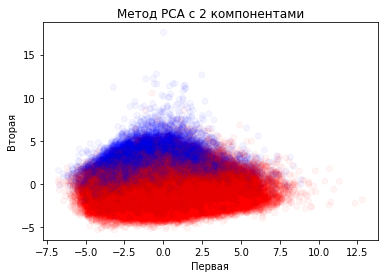

In [133]:
# отмечаем полученные методом РСА точки на графике: синим - завтра будет дождь, красным - нет
plt.scatter(X_pca_two[:, 0], X_pca_two[:, 1], c = colormap, alpha = 0.04)

# настройки графика
plt.title('Метод PCA с 2 компонентами')
plt.xlabel('Первая')
plt.ylabel('Вторая')
pass

##### Проекции (просто интересно)

In [41]:
# применяем метод РСА
pca_model_three = PCA(n_components = 3)
X_pca_three = pca_model_three.fit_transform(X)
X_pca_three

array([[ 0.83426125,  1.36216565,  0.96389002],
       [ 1.05970019, -0.14747402,  0.81099258],
       [ 2.07496505,  0.30662097,  1.72814281],
       ...,
       [-0.61883275, -2.22172095, -0.25037902],
       [ 0.02708888, -1.65067766, -0.17184785],
       [ 0.65738656, -2.40020977, -0.09658863]])

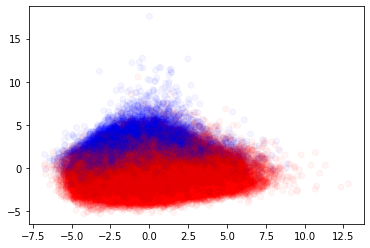

In [135]:
# отмечаем полученные точки на графике: синим - завтра будет дождь, красным - нет
plt.scatter(X_pca_three[:, 0], X_pca_three[:, 1], c = colormap, alpha = 0.04)

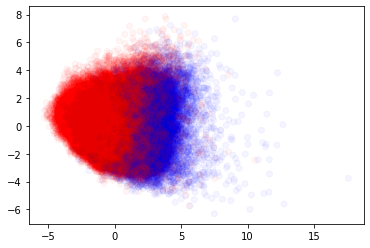

In [136]:
# отмечаем полученные точки на графике: синим - завтра будет дождь, красным - нет
plt.scatter(X_pca_three[:, 1], X_pca_three[:, 2], c = colormap, alpha = 0.04)

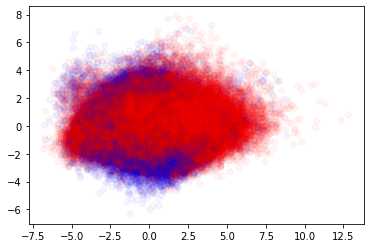

In [137]:
# отмечаем полученные точки на графике: синим - завтра будет дождь, красным - нет
plt.scatter(X_pca_three[:, 0], X_pca_three[:, 2], c = colormap, alpha = 0.04)

##### 1.2 Выводы

Видим, что в полученном признаковом пространстве (после применения метода РСА) данные линейно разделимы. Метод позволяет выделить важные (те, которые имеют наибольший коэффициент главных компонент) и неважные (наименьшие коэффициенты).

##### 1.3 LDA

In [138]:
# конвертируем массив object'ов в массив int'ов (fix warning)
y_new = y.astype(int)

In [139]:
# применяем метод LDA
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X, y_new)
X_lda = lda_model.transform(X)

In [140]:
# делим полученные данные на тестовую и обучающие выборки
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size = 0.33, random_state = 42)

In [141]:
# обучаем классификатор knn (k = 20)
knn_optim = KNeighborsClassifier(n_neighbors = 20)
knn_optim.fit(X_train, list(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [142]:
# считаем среднюю ошибку
err_train = np.mean(y_train != knn_optim.predict(X_train))
err_test  = np.mean(y_test  != knn_optim.predict(X_test))

print(err_train, err_test)

0.1472987015713401 0.15814934788168103


#### 2. К новым данным (после PCA) применить классификатор, показавший наилучшие результаты в предыдущей лабе. 

In [143]:
# Применяем метод РСА к данным (кол-во компонент = 5)
pca_model_five = PCA(n_components = 5)
X_pca_five = pca_model_five.fit_transform(X)
X_pca_five.shape

(142193, 5)

In [144]:
# делим полученные данные на тестовую и обучающие выборки
X_train, X_test, y_train, y_test = train_test_split(X_pca_five, y, test_size = 0.33, random_state = 42)

In [145]:
# обучаем классификатор knn (k = 20)
knn_optim = KNeighborsClassifier(n_neighbors = 20)
knn_optim.fit(X_train, list(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [146]:
# считаем среднюю ошибку
err_train = np.mean(y_train != knn_optim.predict(X_train))
err_test  = np.mean(y_test  != knn_optim.predict(X_test))

print(err_train, err_test)

0.15947475044348108 0.17234251129485978


#### 3. Построить графики зависимости ошибки на тестовой и обучающей выборке в зависимости от количества используемых компонент.

In [147]:
# рассматриваемые количества компонент
components_array = np.arange(1, 50, 2)
# списки для ошибок
test_err = []
train_err = []
# проверяем различные количества компонент
for components in components_array:
    # алгоритм и разделение на тестовую и обучающую выборки
    pca_model = PCA(n_components = components)
    X_pca = pca_model.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.33, random_state = 42)
    # классификатор knn
    knn_optim = KNeighborsClassifier(n_neighbors = 20)
    knn_optim.fit(X_train, list(y_train))
    # вычисление ошибок
    train_err.append(np.mean(y_train != knn_optim.predict(X_train)))
    test_err.append(np.mean(y_test  != knn_optim.predict(X_test)))

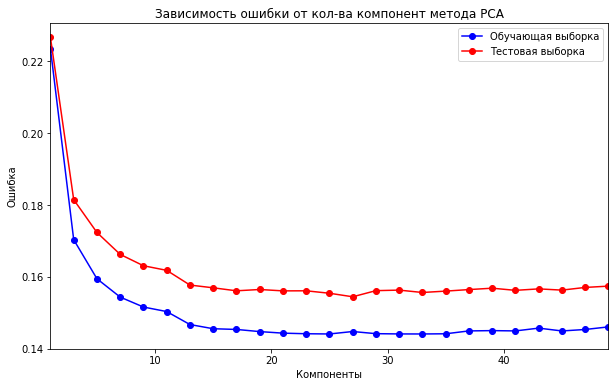

In [148]:
# построение графика зависимости ошибок от кол-ва компонент
plt.figure(figsize = (10, 6))
plt.plot(components_array, train_err, 'b-o', label = 'Обучающая выборка')
plt.plot(components_array, test_err, 'r-o', label = 'Тестовая выборка')

# настройки графика
plt.xlim([np.min(components_array), np.max(components_array)])
plt.title('Зависимость ошибки от кол-ва компонент метода РСА')
plt.xlabel('Компоненты')
plt.ylabel('Ошибка')
plt.legend()

#### 4. Найти наилучшее значение количества используемых главных компонент.

In [149]:
# оптимальное количество компонент
print("Минимальная ошибка:")
print(np.min(train_err), np.min(test_err))
print("Оптимальное количество компонент:")
print(components_array[test_err == np.min(test_err)][0])

Минимальная ошибка:
0.14411823363318604 0.15446253516324268
Оптимальное количество компонент:
27


#### 5. Выводы.

Позволяет ли РСА снизить ошибку? Видим, что ошибка на тестовом наборе данных при оптимальном ($= 27$, искали в интервале от $1$ до $50$) количестве главных компонент метода РСА равна $0.1544$. Без использования метода ошибка на тестовом наборе составляла $0.1547$. Таким образом, делаем вывод, что ошибка практически не изменилась. Метод PCA позволяет уменьшить размерность пространства признаков, но нейтрален для точности предсказаний алгоритма ближайших соседей. 

При использовании метода LDA получили небольшое ухудшение точности предсказаний алгоритмом kNN (ошибка на тестовом наборе = $0.158$).

Уверен, что при использовании других классификаторов (более сложных, например, нейронные сети, деревья решений) точность ухудшится из-за уменьшения пространства признаков и потери некоторых фич данных.

# Unsupervised learning

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

kmeans_random_0 = KMeans(n_clusters = 2, random_state = 0).fit(X)
print('1st try: ' + str(accuracy_score(list(y), kmeans_random_0.labels_)))
kmeans_random_3 = KMeans(n_clusters = 2, random_state = 3).fit(X)
print('2nd try: ' + str(accuracy_score(list(y), kmeans_random_3.labels_)))
kmeans_random_7 = KMeans(n_clusters = 2, random_state = 7).fit(X)
print('3rd try: ' + str(accuracy_score(list(y), kmeans_random_7.labels_)))

1st try: 0.4768378190206269
2nd try: 0.4767534266806383
3rd try: 0.5231692136743722


Видим, что различная начальная инициализация центроид влияет на точность метода. Разница в точности около 5%.

after PCA(2) 0.5225081403444614


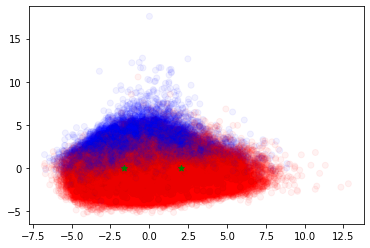

In [39]:
kmeans_pca_duo = KMeans(n_clusters = 2, random_state = 4).fit(X_pca_two)
print('after PCA(2) ' + str(accuracy_score(list(y), kmeans_pca_duo.labels_)))
centers = kmeans_pca_duo.cluster_centers_

plt.scatter(X_pca_two[:, 0], X_pca_two[:, 1],
           c = colormap, alpha = 0.05)
plt.scatter(centers[:, 0], centers[:, 1], marker="*",
           c = "green")

plt.show()

При использовании метода К-средних после применения РСА метода получаем такие же выводы: различная начальная инициализация центроид сильно влияет на точность. Сами центры кластеров расположены достаточно неточно. Выявленная точность: 52.2% на одной из инициализаций.

### РСА(3)

after PCA(3) 0.5222901267994908


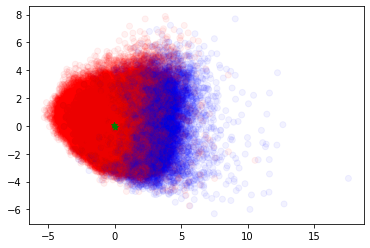

In [46]:
kmeans_pca_three = KMeans(n_clusters = 2, random_state = 4).fit(X_pca_three)
print('after PCA(3) ' + str(accuracy_score(list(y), kmeans_pca_three.labels_)))
centers = kmeans_pca_three.cluster_centers_

plt.scatter(X_pca_three[:, 1], X_pca_three[:, 2],
           c = colormap, alpha = 0.05)
plt.scatter(centers[:, 1], centers[:, 2], marker="*",
           c = "green")

plt.show()

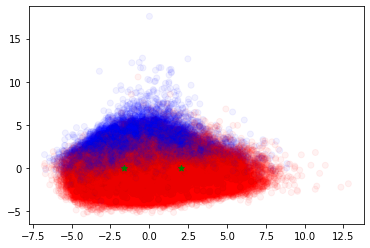

In [47]:
plt.scatter(X_pca_three[:, 0], X_pca_three[:, 1],
           c = colormap, alpha = 0.05)
plt.scatter(centers[:, 0], centers[:, 1], marker="*",
           c = "green")

plt.show()

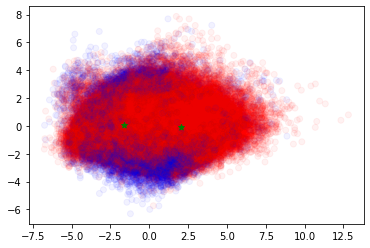

In [48]:
plt.scatter(X_pca_three[:, 0], X_pca_three[:, 2],
           c = colormap, alpha = 0.05)
plt.scatter(centers[:, 0], centers[:, 2], marker="*",
           c = "green")

plt.show()